<a href="https://colab.research.google.com/github/mdsamiakhtar/mdsamiakhtarcreation/blob/main/sentiment_on_youtube_comment_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [5]:
# load the dataset
df=pd.read_csv('/content/YoutubeCommentsDataSet.csv')
df.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [6]:
df = df.dropna(subset=['Comment'])

In [7]:
# Replace 'neg' with 0, 'pos' with 1, and 'nue' with 2
df['Sentiment'] = df['Sentiment'].replace({'negative': 0, 'neutral': 1, 'positive': 2})

df.head()

/tmp/ipython-input-3103559766.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sentiment'] = df['Sentiment'].replace({'negative': 0, 'neutral': 1, 'positive': 2})


,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,1
1,here in nz 50 of retailers don’t even have con...,0
2,i will forever acknowledge this channel with t...,2
3,whenever i go to a place that doesn’t take app...,0
4,apple pay is so convenient secure and easy to ...,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18364 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    18364 non-null  object
 1   Sentiment  18364 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 430.4+ KB


In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)


In [18]:

# Example usage
df['Comment'] = df['Comment'].apply(remove_stopwords)
df.head()

,Comment,Sentiment
0,lets forget apple pay 2014 required brand new ...,1
1,nz 50 retailers don’t even contactless credit ...,0
2,forever acknowledge channel help lessons ideas...,2
3,whenever go place doesn’t take apple pay doesn...,0
4,apple pay convenient secure easy use used kore...,2


In [22]:
# Step 2: Split the data into features (X) and target (y)
X = df['Comment']
y = df['Sentiment']
from sklearn.model_selection import train_test_split

# Step 3: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 4: Convert text data into numerical features using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

In [25]:
# Step 5: Initialize models
models = {
    "Logistic Regression": LogisticRegression(multi_class='ovr', max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42),
    "Naive Bayes": MultinomialNB()
}

In [26]:
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train_tfidf, y_train)

    # Predict the sentiments for the test set
    y_pred = model.predict(X_test_tfidf)

    # Evaluate the model
    print(f"Accuracy Score for {model_name}: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")


Training Logistic Regression...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy Score for Logistic Regression: 0.7500680642526545
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.65      0.26      0.37       441
           1       0.63      0.55      0.59       912
           2       0.79      0.92      0.85      2320

    accuracy                           0.75      3673
   macro avg       0.69      0.58      0.60      3673
weighted avg       0.73      0.75      0.73      3673


Training Random Forest...
Accuracy Score for Random Forest: 0.732371358562483
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.58      0.18      0.27       441
           1       0.62      0.55      0.58       912
           2       0.77      0.91      0.84      2320

    accuracy                           0.73      3673
   macro avg       0.66      0.55      0.56      3673
weighted avg       0.71      0.73      0.71      3673


Training SV

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


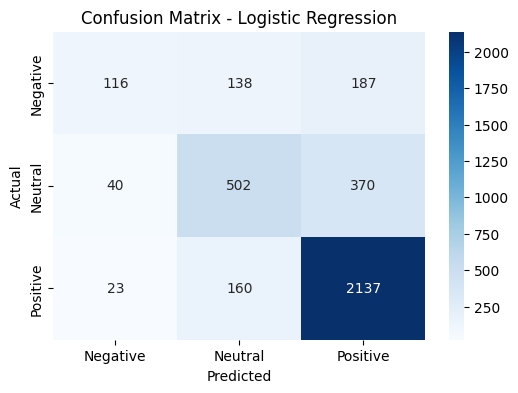

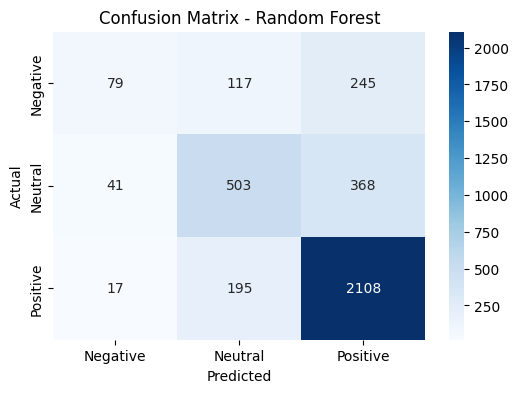

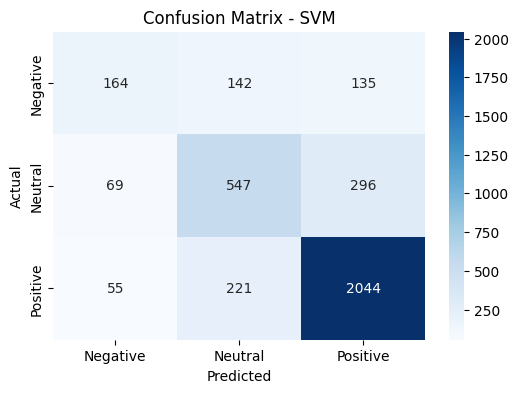

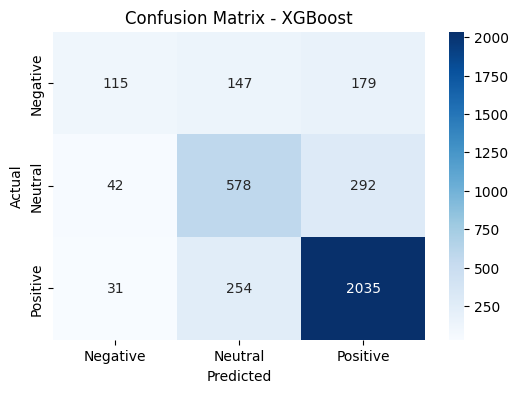

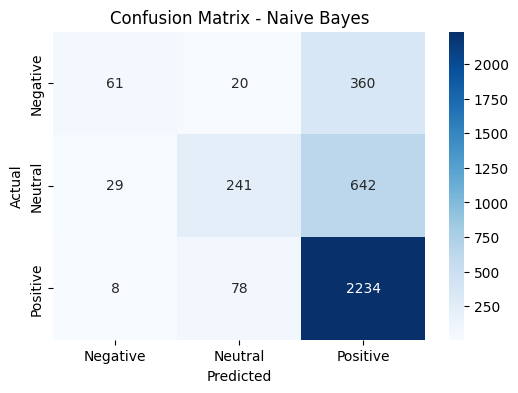

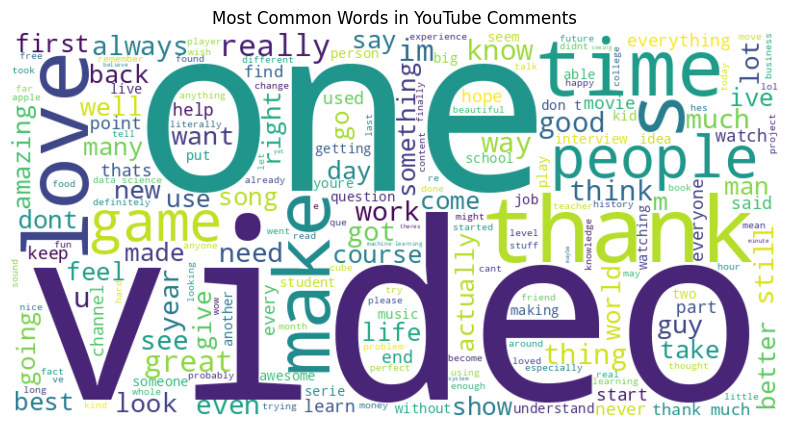

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import wordcloud
from sklearn.metrics import confusion_matrix, accuracy_score # Make sure accuracy_score is imported

# store model names and their accuracies
model_names = [] # <-- RENAMED: from 'model_name' to 'model_names'
accuracies = []

# Assume 'models' is a dictionary like: {'Logistic Regression': model_object, ...}
# Assume X_train_tfidf, y_train, X_test_tfidf, y_test are defined

# Train model and collect performence metrices
for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    # store model name and accuracy
    model_names.append(model_name) # <-- FIXED: Appending the string 'model_name' to the list 'model_names'
    accuracies.append(accuracy_score(y_test, y_pred))

    # plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", # <-- FIXED: 'camp' changed to 'cmap'
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Combine all comments into one long string, separated by spaces
text_data = " ".join(df["Comment"].dropna().astype(str))

# Create the WordCloud object
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

# Display Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in YouTube Comments")
plt.show()